In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


In [3]:
data = pd.read_csv("C:/Users/ADutta161630/Downloads/assignment/day.csv")

In [4]:
print(data.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


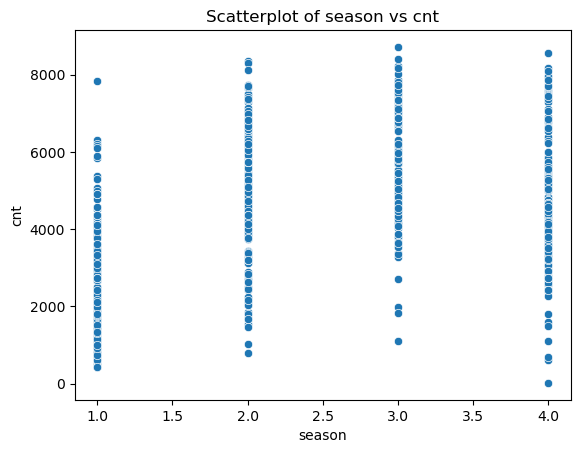

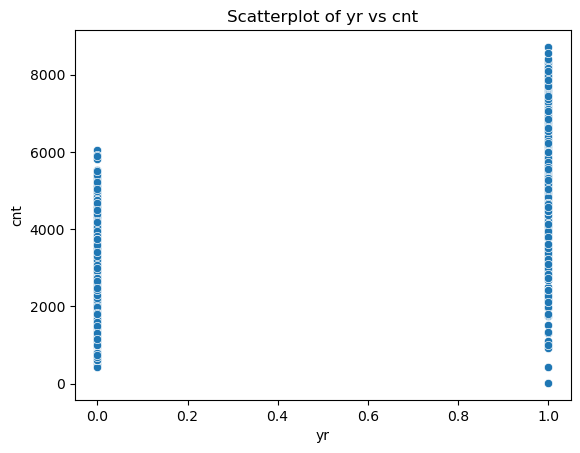

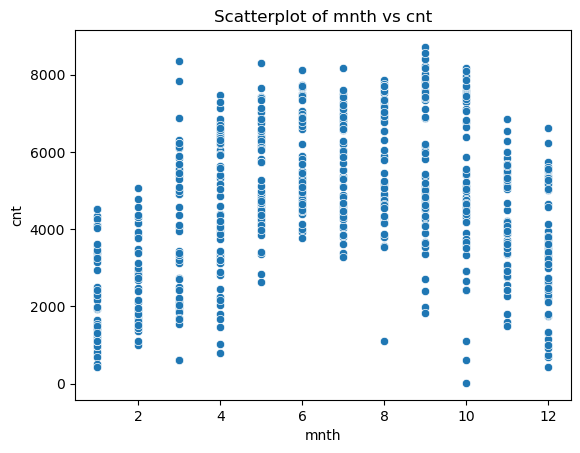

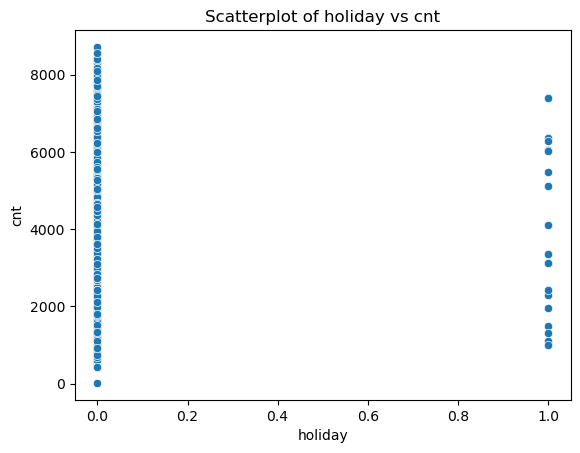

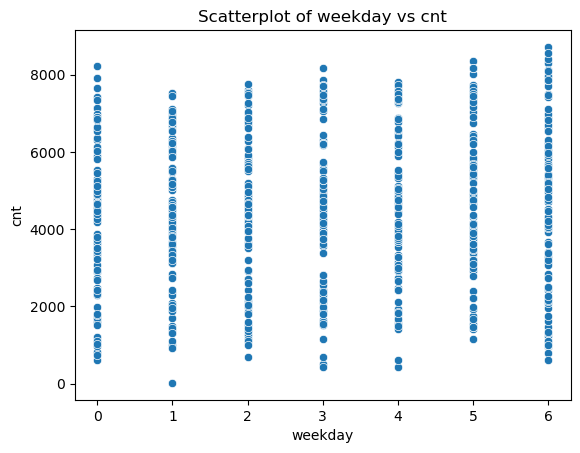

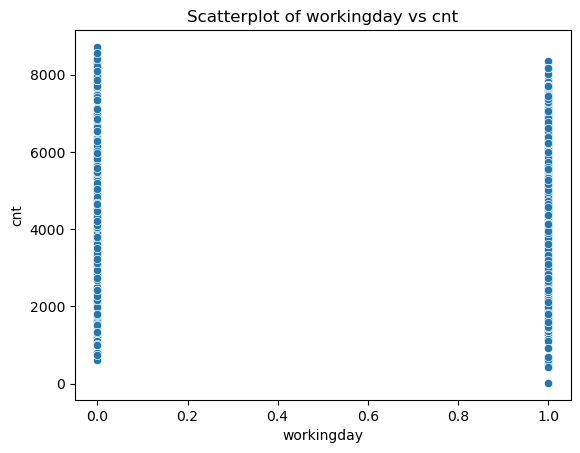

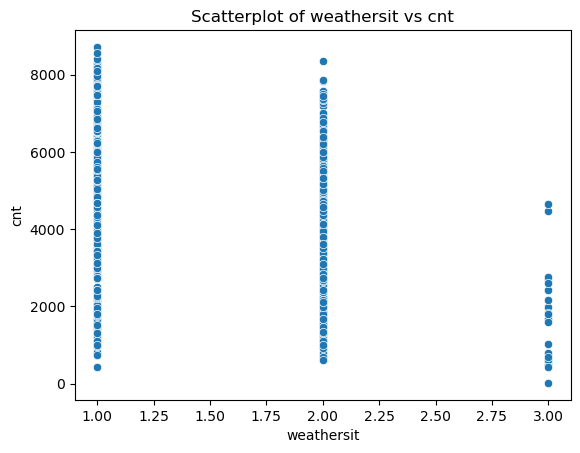

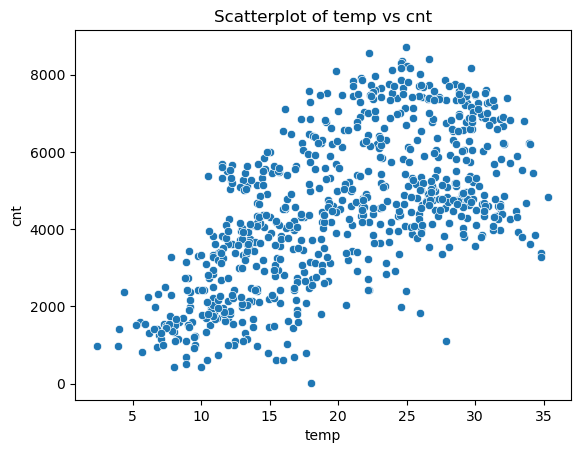

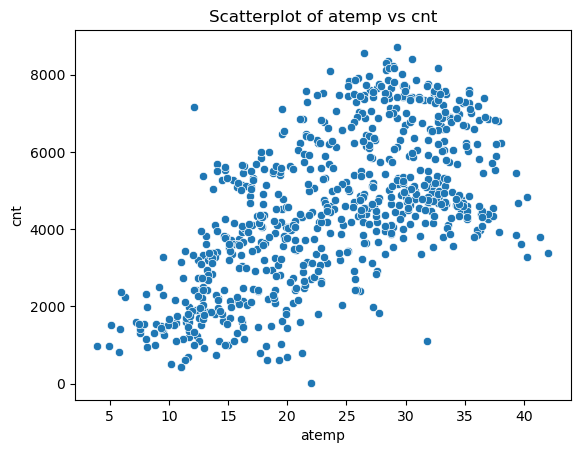

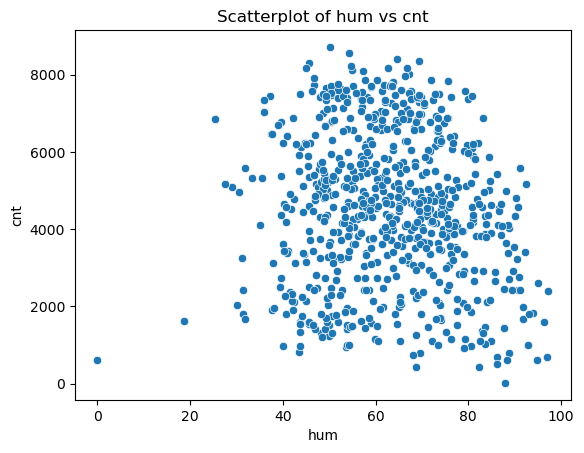

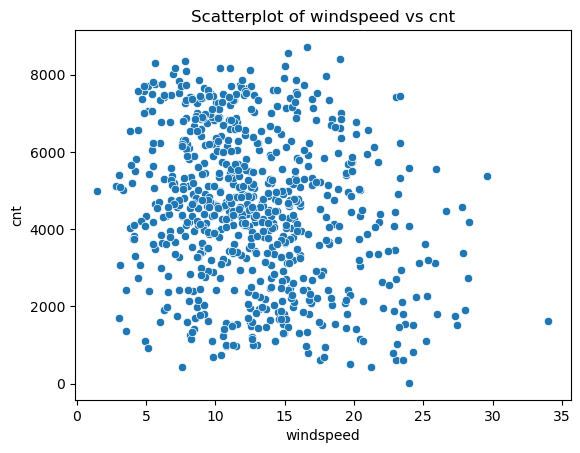

In [5]:
variables = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
for var in variables:
    sns.scatterplot(x=var, y='cnt', data=data)
    plt.xlabel(var)
    plt.ylabel('cnt')
    plt.title(f'Scatterplot of {var} vs cnt')
    plt.show()


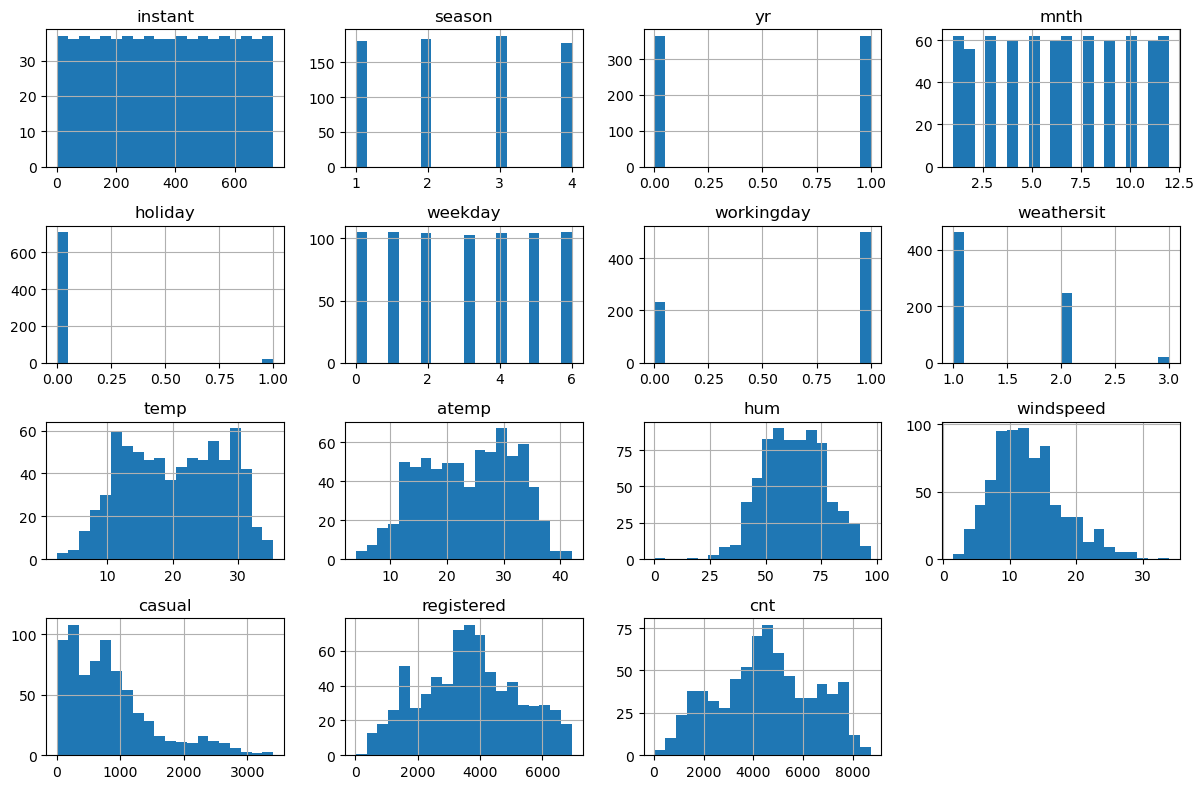

In [6]:
data.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()


In [13]:
X = data[variables]
y = data['cnt']
model = sm.OLS(y,X)
results=model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              1943.
Date:                Sun, 18 Jun 2023   Prob (F-statistic):                        0.00
Time:                        11:41:28   Log-Likelihood:                         -5989.3
No. Observations:                 730   AIC:                                  1.200e+04
Df Residuals:                     719   BIC:                                  1.205e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [14]:
predictions = results.predict(X)
residuals = y - predictions
mse = ((residuals) ** 2).mean()
rmse = mse ** 0.5
mae = abs(residuals).mean()
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


MSE: 783172.1741026047
RMSE: 884.970154356973
MAE: 656.7254536144311


In [15]:
r2 = results.rsquared
adj_r2 = results.rsquared_adj

print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adj_r2}")


R-squared: 0.9674561452360271
Adjusted R-squared: 0.9669582559420025


In [17]:
X_C = data[variables]
X_C=sm.add_constant(X_C)

model = sm.OLS(y,X_C)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     262.8
Date:                Sun, 18 Jun 2023   Prob (F-statistic):          4.25e-243
Time:                        11:48:30   Log-Likelihood:                -5970.9
No. Observations:                 730   AIC:                         1.197e+04
Df Residuals:                     718   BIC:                         1.202e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1458.4924    239.649      6.086      0.0

In [20]:
import matplotlib.pyplot as plt

from statsmodels.graphics.regressionplots import plot_regress_exog, influence_plot

In [25]:
residuals = results.resid



# Outliers, leverage, and influential points
outliers = results.outlier_test()["bonf(p)"] < 0.05
leverage = results.get_influence().hat_matrix_diag
influential_points = leverage > 2 * (X.shape[1] + 1) / X.shape[0]

print("Outliers:")
print(data[outliers])
print("Leverage:")
print(data[leverage > 0.05])
print("Influential Points:")
print(data[influential_points])



Outliers:
     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
552      553  07-07-2019       3   1     7        0        6           0   
666      667  29-10-2019       4   1    10        0        1           1   
667      668  30-10-2019       4   1    10        0        2           1   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
552           1  35.328347  40.24565  49.2083  10.958118    1448        3392   
666           3  18.040000  21.97000  88.0000  23.999400       2          20   
667           2  13.045462  15.49545  82.5455  14.271603      87        1009   

      cnt  
552  4840  
666    22  
667  1096  
Leverage:
     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
16        17  17-01-2018       1   0     1        1        1           0   
51        52  21-02-2018       1   0     2        1        1           0   
68        69  10-03-2018       1   0     3        0        4           1   
10

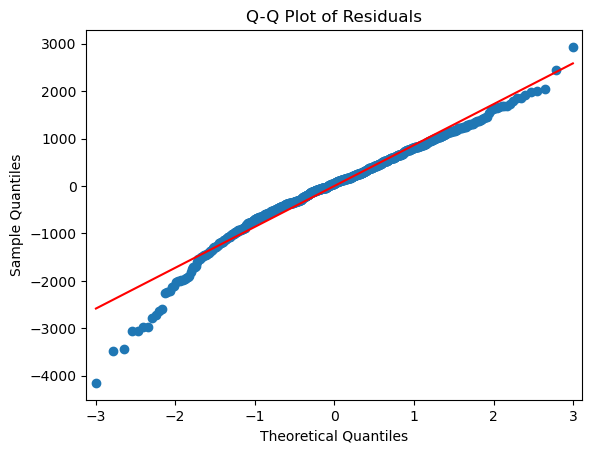

In [31]:


# Plot residuals Q-Q Plot and check normality
sm.qqplot(residuals, line='s')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title("Q-Q Plot of Residuals")
plt.show()


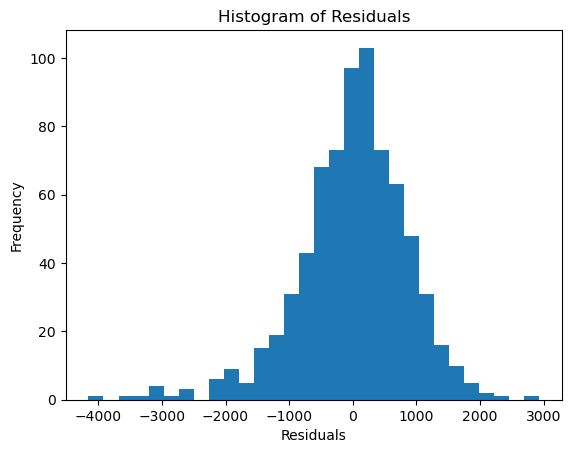

Mean of Residuals: 7.82414620155341e-12
Standard Deviation of Residuals: 863.582626594612


In [27]:
# Plot residuals histogram and calculate mean with standard deviation
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

residuals_mean = residuals.mean()
residuals_std = residuals.std()
print("Mean of Residuals:", residuals_mean)
print("Standard Deviation of Residuals:", residuals_std)


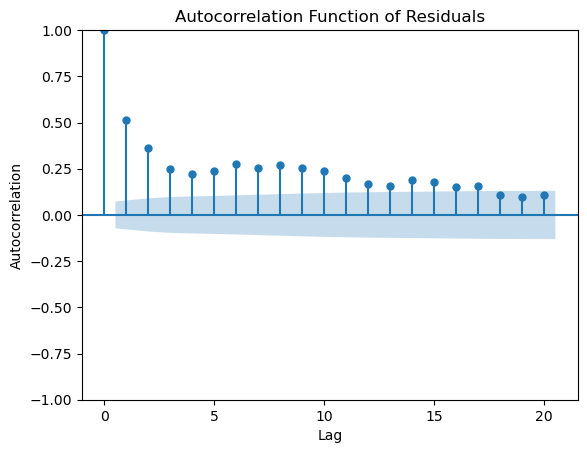

In [30]:
# Plot residuals ACF and perform serial correlation test
sm.graphics.tsa.plot_acf(residuals, lags=20)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Function of Residuals")
plt.show()




